### Imports

In [1]:
import h5py
import numba
import numpy as np
import pandas as pd
import scipy.integrate
import matplotlib as mpl
import matplotlib.pyplot as plt
from hoki.utils.exceptions import HokiFormatError
from hoki.constants import BPASS_METALLICITIES, BPASS_NUM_METALLICITIES
from pylab import cm
from scipy.special import gammainc
from scipy.special import gamma

Colormap

In [2]:
BPASS_METALS = ["10$^{-5}$", "10$^{-4}$", "0.001", "0.002", "0.003", "0.004", "0.006", "0.008", "0.010", "0.014", "0.020", "0.030", "0.040"]

In [3]:
NUM_COLORS = len(BPASS_METALS)
cmap = plt.get_cmap('coolwarm')
bounds = np.linspace(0, NUM_COLORS, NUM_COLORS + 1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

### Data

In [4]:
h = 0.6766

In [5]:
file = h5py.File("/Users/dillon/Desktop/data.h5", "r")
SFH = file['SFH']['empirical']
briel_emp = np.sum(SFH, axis=0)

In [6]:
redshift_values = SFH.attrs['redshift']

In [7]:
#redshift_values = np.linspace(0, 20, 500)

In [8]:
briel_0 = SFH[0, :]
briel_1 = SFH[1, :]
briel_2 = SFH[2, :]
briel_3 = SFH[3, :]
briel_4 = SFH[4, :]
briel_5 = SFH[5, :]
briel_6 = SFH[6, :]
briel_7 = SFH[7, :]
briel_8 = SFH[8, :]
briel_9 = SFH[9, :]
briel_10 = SFH[10, :]
briel_11 = SFH[11, :]
briel_12 = SFH[12, :]


In [9]:
num_rows, num_columns = SFH.shape

In [10]:
solar_z = 0.020

Harikane

In [12]:
harikane = 1 /(61.7 * (1+redshift_values)**(-3.13) + 1.0 * 10**(0.22*(1+redshift_values)) + 2.4 * 10**(0.5*(1+redshift_values) - 3.0))

<ipython-input-12-b034a08c04c4>:1: RuntimeWarning: overflow encountered in power
  harikane = 1 /(61.7 * (1+redshift_values)**(-3.13) + 1.0 * 10**(0.22*(1+redshift_values)) + 2.4 * 10**(0.5*(1+redshift_values) - 3.0))


In [13]:
kroupa_factor = 0.66
cosmo_factor = (0.6889/0.7) * (0.3111/0.3) /(h/0.7)

trans_harikane = harikane * kroupa_factor * cosmo_factor

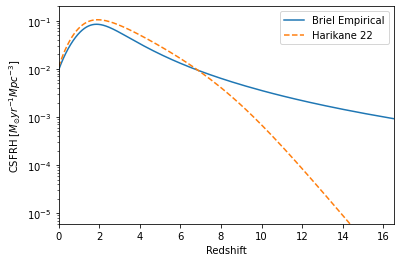

In [36]:
plt.plot(SFH.attrs['redshift'], np.sum(SFH, axis=0), label = 'Briel Empirical')
plt.plot(redshift_values, trans_harikane, '--', label = 'Harikane 22')
plt.yscale('log')
plt.xlim(0, 16.5)
plt.ylim(6e-6, 2e-1)
plt.xlabel('Redshift')
plt.ylabel('CSFRH [$M_{\odot} yr^{-1} Mpc^{-3}$]')
plt.legend()

Langer & Norman Set-up

In [15]:
def langer_norman(metallicity):
    t_2 = (metallicity/solar_z)**2 * 10**(0.3*redshift_values)
    frac = gammainc(0.84, t_2)/gamma(0.84)
    tot = trans_harikane * frac 
    return tot 

In [16]:
met_upper = [0.000055, 0.00055, 0.0015, 0.0025, 0.0035, 0.005, 0.007, 0.009, 0.012, 0.017, 0.025, 0.035, 0.045]

met_lower = [0, 0.000055, 0.00055, 0.0015, 0.0025, 0.0035, 0.005, 0.007, 0.009, 0.012, 0.017, 0.025, 0.035]

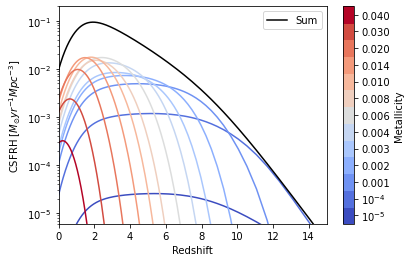

In [17]:
result_diff = []

for i, (upper, lower) in enumerate(zip(met_upper, met_lower)):
    diff = langer_norman(upper) - langer_norman(lower)
    result_diff.append(diff)
    
    plt.plot(redshift_values, diff, color=cmap(norm(i)))

plt.plot(redshift_values, np.sum(result_diff, axis=0), color='black', label='Sum')



sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ticks=np.arange(NUM_COLORS) + 0.5, boundaries=bounds, label='Metallicity')

cbar.set_ticklabels(BPASS_METALS)
plt.yscale('log')
plt.xlim(0, 15)
plt.ylim(6e-6, 2e-1)
plt.xlabel('Redshift')
plt.ylabel('CSFRH [$M_{\odot} yr^{-1} Mpc^{-3}$]')



#plt.plot(SFH.attrs['redshift'], np.sum(SFH, axis=0), '--', label = 'Briel')    

plt.yscale('log')
plt.xlim(0, 15)
plt.ylim(6e-6, 2e-1)
plt.xlabel('Redshift')
plt.ylabel('CSFRH [$M_{\odot} yr^{-1} Mpc^{-3}$]')
plt.legend()

Testing Each Metallicity

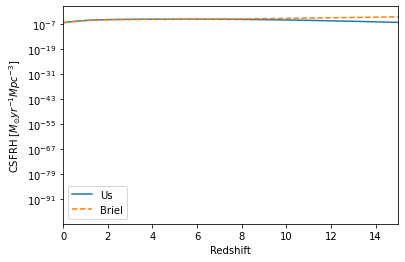

In [18]:
plt.plot(redshift_values, langer_norman(0.000055) - langer_norman(0), label = 'Us')
plt.plot(redshift_values, briel_0, '--', label = 'Briel')
plt.yscale('log')
plt.xlim(0, 15)
#plt.ylim(6e-6, 2e-1)
plt.xlabel('Redshift')
plt.ylabel('CSFRH [$M_{\odot} yr^{-1} Mpc^{-3}$]')
plt.legend()

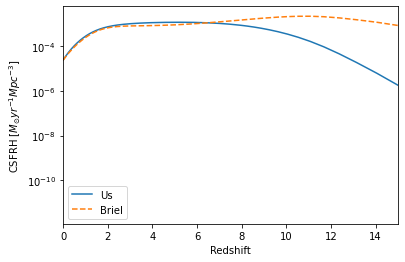

In [19]:
plt.plot(redshift_values, langer_norman(0.00055) - langer_norman(0.000055), label = 'Us')
plt.plot(redshift_values, briel_1, '--', label = 'Briel')
plt.yscale('log')
plt.xlim(0, 15)
#plt.ylim(6e-6, 2e-1)
plt.xlabel('Redshift')
plt.ylabel('CSFRH [$M_{\odot} yr^{-1} Mpc^{-3}$]')
plt.legend()

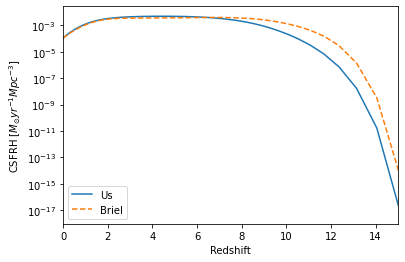

In [20]:
plt.plot(redshift_values, langer_norman(0.0015) - langer_norman(0.00055), label = 'Us')
plt.plot(redshift_values, briel_2, '--', label = 'Briel')
plt.yscale('log')
plt.xlim(0, 15)
#plt.ylim(6e-6, 2e-1)
plt.xlabel('Redshift')
plt.ylabel('CSFRH [$M_{\odot} yr^{-1} Mpc^{-3}$]')
plt.legend()

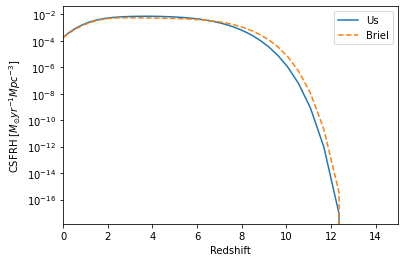

In [21]:
plt.plot(redshift_values, langer_norman(0.0025) - langer_norman(0.0015), label = 'Us')
plt.plot(redshift_values, briel_3, '--', label = 'Briel')
plt.yscale('log')
plt.xlim(0, 15)
#plt.ylim(6e-6, 2e-1)
plt.xlabel('Redshift')
plt.ylabel('CSFRH [$M_{\odot} yr^{-1} Mpc^{-3}$]')
plt.legend()

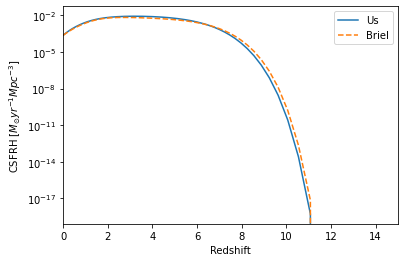

In [22]:
plt.plot(redshift_values, langer_norman(0.0035) - langer_norman(0.0025), label = 'Us')
plt.plot(redshift_values, briel_4, '--', label = 'Briel')
plt.yscale('log')
plt.xlim(0, 15)
#plt.ylim(6e-6, 2e-1)
plt.xlabel('Redshift')
plt.ylabel('CSFRH [$M_{\odot} yr^{-1} Mpc^{-3}$]')
plt.legend()

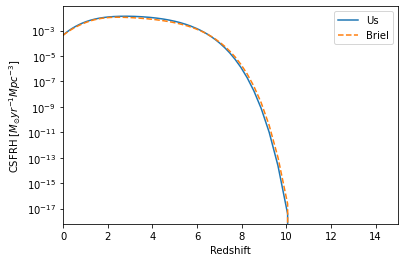

In [23]:
plt.plot(redshift_values, langer_norman(0.005) - langer_norman(0.0035), label = 'Us')
plt.plot(redshift_values, briel_5, '--', label = 'Briel')
plt.yscale('log')
plt.xlim(0, 15)
#plt.ylim(6e-6, 2e-1)
plt.xlabel('Redshift')
plt.ylabel('CSFRH [$M_{\odot} yr^{-1} Mpc^{-3}$]')
plt.legend()

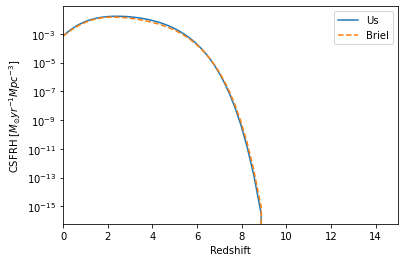

In [24]:
plt.plot(redshift_values, langer_norman(0.007) - langer_norman(0.005), label = 'Us')
plt.plot(redshift_values, briel_6, '--', label = 'Briel')
plt.yscale('log')
plt.xlim(0, 15)
#plt.ylim(6e-6, 2e-1)
plt.xlabel('Redshift')
plt.ylabel('CSFRH [$M_{\odot} yr^{-1} Mpc^{-3}$]')
plt.legend()

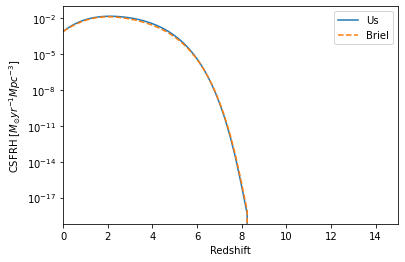

In [25]:
plt.plot(redshift_values, langer_norman(0.009) - langer_norman(0.007), label = 'Us')
plt.plot(redshift_values, briel_7, '--', label = 'Briel')
plt.yscale('log')
plt.xlim(0, 15)
#plt.ylim(6e-6, 2e-1)
plt.xlabel('Redshift')
plt.ylabel('CSFRH [$M_{\odot} yr^{-1} Mpc^{-3}$]')
plt.legend()

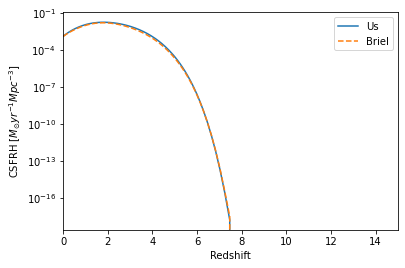

In [26]:
plt.plot(redshift_values, langer_norman(0.012) - langer_norman(0.009), label = 'Us')
plt.plot(redshift_values, briel_8, '--', label = 'Briel')
plt.yscale('log')
plt.xlim(0, 15)
#plt.ylim(6e-6, 2e-1)
plt.xlabel('Redshift')
plt.ylabel('CSFRH [$M_{\odot} yr^{-1} Mpc^{-3}$]')
plt.legend()

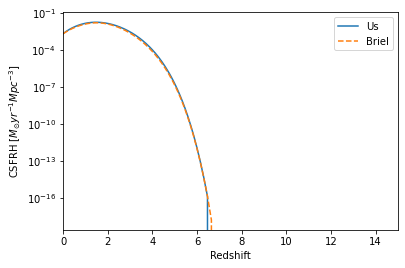

In [27]:
plt.plot(redshift_values, langer_norman(0.017) - langer_norman(0.012), label = 'Us')
plt.plot(redshift_values, briel_9, '--', label = 'Briel')
plt.yscale('log')
plt.xlim(0, 15)
#plt.ylim(6e-6, 2e-1)
plt.xlabel('Redshift')
plt.ylabel('CSFRH [$M_{\odot} yr^{-1} Mpc^{-3}$]')
plt.legend()

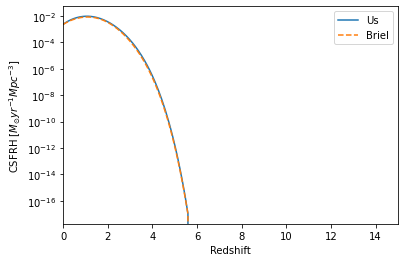

In [28]:
plt.plot(redshift_values, langer_norman(0.025) - langer_norman(0.017), label = 'Us')
plt.plot(redshift_values, briel_10, '--', label = 'Briel')
plt.yscale('log')
plt.xlim(0, 15)
#plt.ylim(6e-6, 2e-1)
plt.xlabel('Redshift')
plt.ylabel('CSFRH [$M_{\odot} yr^{-1} Mpc^{-3}$]')
plt.legend()

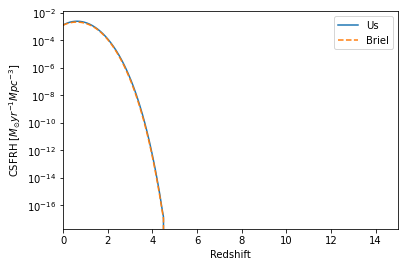

In [29]:
plt.plot(redshift_values, langer_norman(0.035) - langer_norman(0.025), label = 'Us')
plt.plot(redshift_values, briel_11, '--', label = 'Briel')
plt.yscale('log')
plt.xlim(0, 15)
#plt.ylim(6e-6, 2e-1)
plt.xlabel('Redshift')
plt.ylabel('CSFRH [$M_{\odot} yr^{-1} Mpc^{-3}$]')
plt.legend()

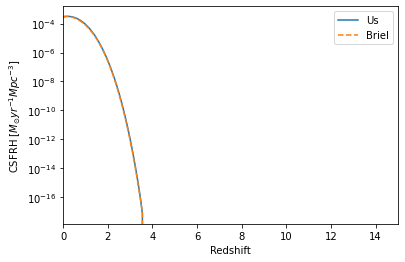

In [30]:
plt.plot(redshift_values, langer_norman(0.045) - langer_norman(0.035), label = 'Us')
plt.plot(redshift_values, briel_12, '--', label = 'Briel')
plt.yscale('log')
plt.xlim(0, 15)
#plt.ylim(6e-6, 2e-1)
plt.xlabel('Redshift')
plt.ylabel('CSFRH [$M_{\odot} yr^{-1} Mpc^{-3}$]')
plt.legend()

Briel

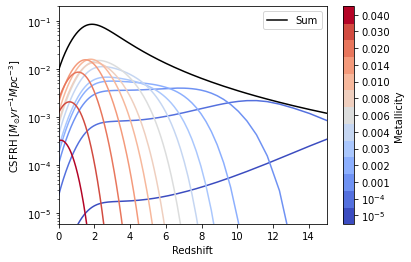

In [31]:
num_rows, num_columns = SFH.shape

for i in range(num_rows):
    plt.plot(redshift_values, SFH[i, :], color=cmap(norm(i)))
    
plt.plot(redshift_values, np.sum(SFH, axis=0), color = 'black', label = 'Sum')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ticks=np.arange(NUM_COLORS) + 0.5, boundaries=bounds, label='Metallicity')
cbar.set_ticklabels(BPASS_METALS)

plt.xlabel('Redshift')
plt.ylabel('Values')
plt.yscale('log')
plt.xlim(0, 15)
plt.ylim(6e-6, 2e-1)
plt.xlabel('Redshift')
plt.ylabel('CSFRH [$M_{\odot} yr^{-1} Mpc^{-3}$]')
plt.legend()

Comparison with Briel

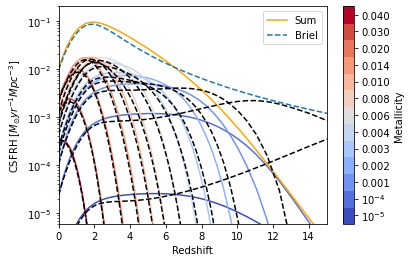

In [32]:
result_diff = []

for i, (upper, lower) in enumerate(zip(met_upper, met_lower)):
    diff = langer_norman(upper) - langer_norman(lower)
    result_diff.append(diff)
    
    plt.plot(redshift_values, diff, color=cmap(norm(i)))

plt.plot(redshift_values, np.sum(result_diff, axis=0), color='orange', label='Sum')



sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ticks=np.arange(NUM_COLORS) + 0.5, boundaries=bounds, label='Metallicity')

cbar.set_ticklabels(BPASS_METALS)
plt.yscale('log')
plt.xlim(0, 15)
plt.ylim(6e-6, 2e-1)
plt.xlabel('Redshift')
plt.ylabel('CSFRH [$M_{\odot} yr^{-1} Mpc^{-3}$]')


    
for i in range(num_rows):
    plt.plot(redshift_values, SFH[i, :], '--', color = 'black')
    


plt.plot(SFH.attrs['redshift'], np.sum(SFH, axis=0), '--', label = 'Briel')    

plt.yscale('log')
plt.xlim(0, 15)
plt.ylim(6e-6, 2e-1)
plt.xlabel('Redshift')
plt.ylabel('CSFRH [$M_{\odot} yr^{-1} Mpc^{-3}$]')
plt.legend()

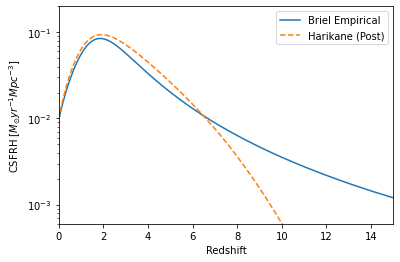

In [34]:
plt.plot(SFH.attrs['redshift'], np.sum(SFH, axis=0), label = 'Briel Empirical')
plt.plot(SFH.attrs['redshift'], np.sum(result_diff, axis=0), '--', label = 'Harikane (Post)')
plt.yscale('log')
plt.xlim(0, 15)
plt.ylim(6e-4, 2e-1)
plt.xlabel('Redshift')
plt.ylabel('CSFRH [$M_{\odot} yr^{-1} Mpc^{-3}$]')
plt.legend()

output_file_path = f'/Users/dillon/Desktop/split_output_harikane22.h5'


with h5py.File(output_file_path, 'w') as file:
    dataset = file.create_dataset('star_form_hist_harikane22', shape=(13, 500), dtype='<f8')

    dataset[:] = result_diff
    
    dataset.attrs['redshift'] = redshift_values
